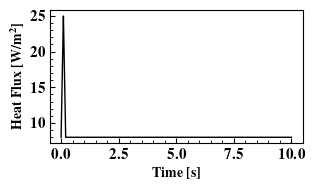

In [7]:
from matplotlib import pyplot as plt,rc
import numpy as np
import pandas as pd
from dataclasses import dataclass
from recrystallization.common_util import setup_axis_default
rc('font',**{'family':'serif','serif':['Times New Roman'],'weight': 'bold'})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = "".join([r"\usepackage{newtxtext,newtxmath}",r"\boldmath"])

@dataclass  
class TriangularHeatFlux:

    qmin: float
    qmax: float
    period: float
    
    def __post_init__(self):
        self.slope = (self.qmax - self.qmin) / (self.period/2)

    def __call__(self, t: float) -> float:
        t = t % self.period
        if t <= self.period/2:
            return self.qmin + self.slope * t
        
        return self.qmax - self.slope * (t - self.period/2)


transient_hf = TriangularHeatFlux(8e6, 25e6, 0.2)
t = np.linspace(0, 0.2, 1000)
hf = np.array([transient_hf(tt) for tt in t]).squeeze() 

t = np.concatenate([t,np.linspace(t[-1],10,1000)])
hf = np.concatenate([hf,np.ones(1000)*8e6])

fig,ax = plt.subplots(figsize = (3.25, 2.0))
setup_axis_default(ax)
ax.plot(t,hf*1e-6, lw = 1., color = 'k')
ax.set_xlabel(r'\textbf{Time [s]}')   
ax.set_ylabel(r'\textbf{Heat Flux [W/m$^2$]}')
fig.tight_layout()
fig.savefig('triangular_heat_flux.svg')

